# Extracted WLCs

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/f6rqfis0rdd0w1r/AAADJF0JI-YEx1cS9oCiwKP6a?dl=1) (same dataset used for extracted spectra)

Unzip this into a folder named `data` in the same level as this notebook

## Finish set-up

In [4]:
! ln -srf data/extracted_spectra data/extracted_wlcs

## Load

In [70]:
# Load
base_dir = "data/extracted_wlcs"

data_dict = {
    "Transit 1": {
        "data": utils.load_pickle(
            f"{base_dir}/ut131219_a15_25_noflat/LCs_w50_ut131219_bins.pkl"
        ),
        "comps_to_highlight": ["c13", "c15", "c18", "c20", "c21", "c23"],
        "bad_idxs_user": "[81, 172, 175, 204]",
        "t0": Time("2013-12-19 03:22").jd,
    },
    "Transit 2": {
        "data": utils.load_pickle(
            f"{base_dir}/ut150927_a15_25_noflat/LCs_w50_ut150927_bins.pkl"
        ),
        "bad_idxs_user": "[7, 8, 11, 31, 33, 89, 136, 239, 240, 322]",
        "comps_to_highlight": ["c13", "c15", "c18", "c20", "c21", "c23"],
        "t0": Time("2015-09-27 06:37").jd,
    },
    "Transit 3": {
        "data": utils.load_pickle(
            f"{base_dir}/ut161211_a24_42_noflat/LCs_w50_ut161211_bins.pkl"
        ),
        "bad_idxs_user": "[17, 18, 40:45, 52, 55, 88, 211]",
        "comps_to_highlight": ["c06", "c13"],
        "t0": Time("2016-12-12 03:03").jd,
    },
}

## Plot

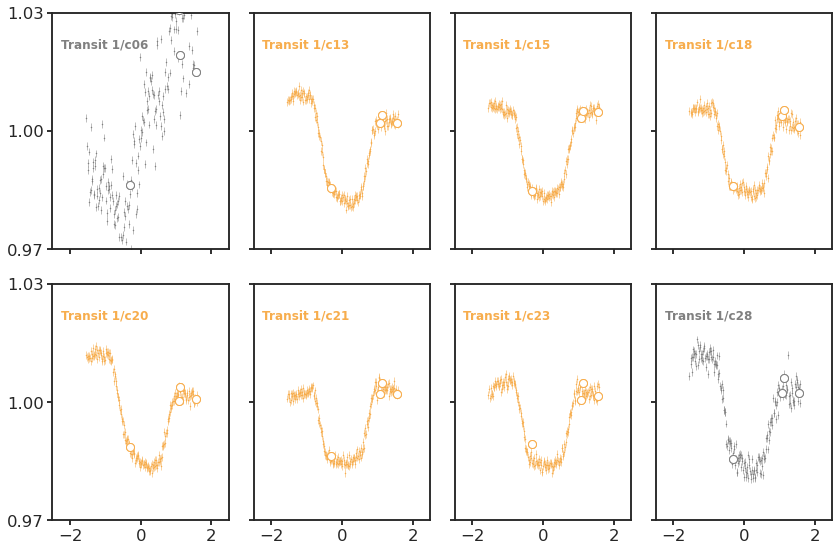

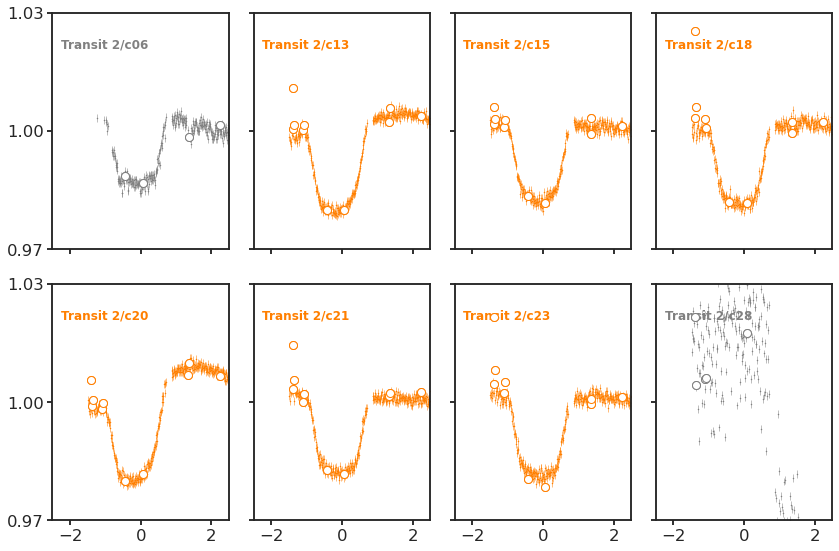

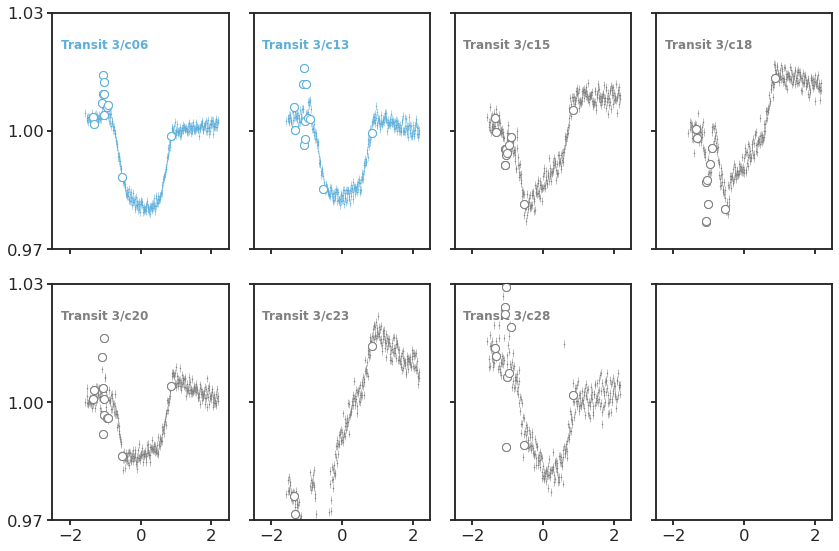

In [75]:
colors = sns.color_palette()
for i, (transit_name, transit_info) in enumerate(data_dict.items()):
    data = transit_info["data"]
    t0 = transit_info["t0"]
    comps = data["cNames"]
    comps_to_highlight = transit_info["comps_to_highlight"]
    bad_idxs_user = transit_info["bad_idxs_user"]
    ncomps = len(comps)
    nrows = 2
    ncols = 4 #int(ncomps / nrows)
    
    fig, axes = plt.subplots(
        nrows, ncols, 
        sharex =True, sharey=True,
        figsize = (12, 8),
    )
    
    #print(transit_name)
    for ax, comp in zip(axes.flat, comps): 
        p, bad_idxs = utils.plot_divided_wlcs(
            ax,
            data,
            t0 = t0,
            ferr = 0.001,
            comps_to_use = [comp],
            div_kwargs = {"fmt": ".", "lw": 0.5, "mew": 0.0, "ms": 3, "c": colors[i]},
            bad_div_kwargs = {"marker": "o", "lw": 0, "mew": 1, "mec": colors[i], "ms": 8, "c": "w"},
            bad_idxs_user = bad_idxs_user,
            comps_to_highlight = comps_to_highlight,
        )
        #print(comp)
        #print(bad_idxs)

        if comp not in comps_to_highlight:
            ann_c = "grey"
        else:
            ann_c = colors[i]
        ax.annotate(
            rf"{transit_name}/{comp}",
            xy = (0.05, 0.85),
            xycoords = "axes fraction",
            fontsize = 12,
            color = ann_c,
            weight = "bold",
        )

        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(0.97, 1.02)
        ax.yaxis.set_ticks([0.97, 1.00, 1.03])
        
        fig.tight_layout()    
    print()

#fig.text(0.54, -0.02, "Time from estimated mid-transit (hours)", ha="center")
#fig.text(-0.01, 0.5, "Normalizd flux", va="center", rotation="vertical")
#fig.set_size_inches(FIG_LARGE)

#utils.savefig("../paper/figures/extracted_wlcs/all_transits_extr_wlcs.pdf")